In [1]:
# import system libs
import os
import time
import shutil

import pathlib
import itertools

from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from PIL import Image
import tensorflow.keras as K
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.models import Model
# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow.keras as K
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.layers import GlobalAveragePooling2D, Lambda
from tensorflow.keras.optimizers import Adam
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications.xception import Xception
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!unzip /gdrive/MyDrive/dataset/cassava-leaf.zip > /dev/null

In [ ]:
train_folder = "/content/cassava-leaf-disease/train"
test_folder = "/content/cassava-leaf-disease/val"

In [ ]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))
 
count_files(os.path.join(train_folder))


There are 1526 files in Cassava Brown Streak Disease (CBSD)
There are 1663 files in Cassava Green Mottle (CGM)
There are 757 files in Cassava Bacterial Blight (CBB)
There are 1797 files in Healthy
There are 2214 files in Cassava Mosaic Disease (CMD)


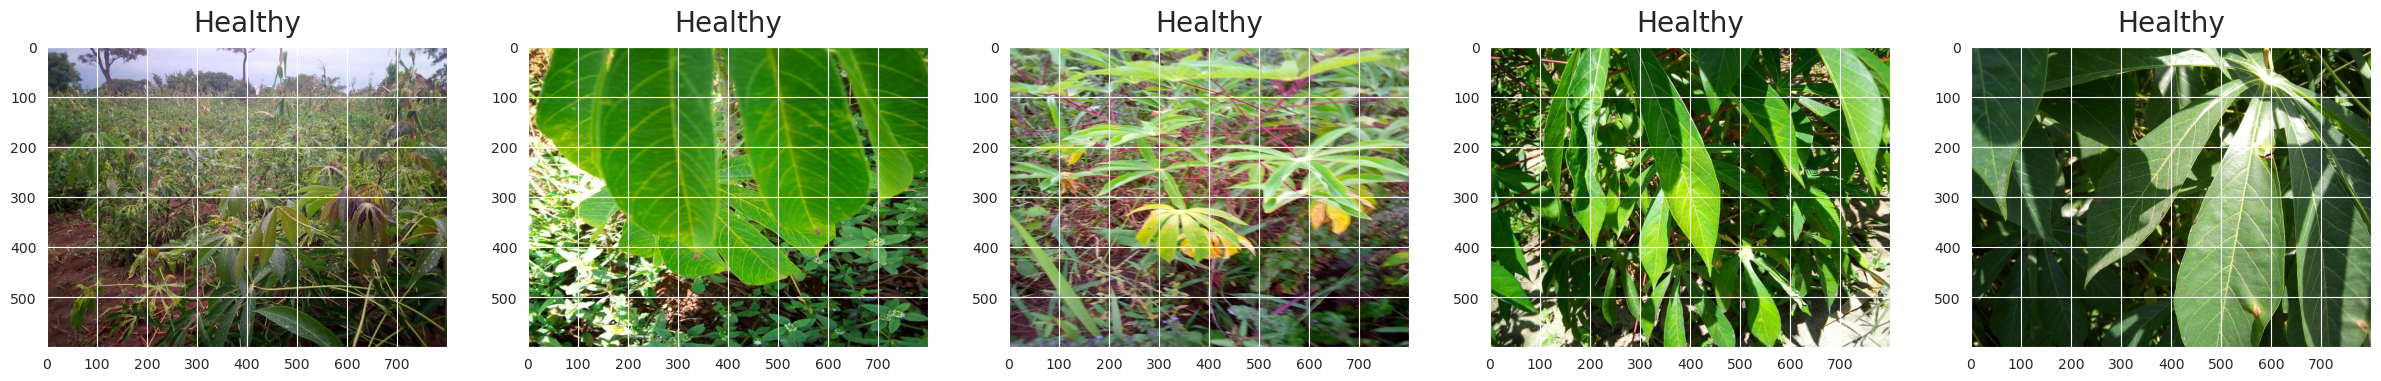

In [ ]:
select_plant="Healthy"
rows,columns = 1,5

display_folder=os.path.join(train_folder,select_plant)
total_images=rows*columns
fig=plt.figure(1, figsize=(30, 10))

for i,j in enumerate(os.listdir(display_folder)):      
    
    img = plt.imread(os.path.join(train_folder,select_plant,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_plant, pad = 11, size=20)
    plt.imshow(img)
    
    if i==total_images-1:
        break

In [4]:
n_cat =5

batch_size = 64
batch_size_predict = 64
input_shape = [299,299]


In [10]:
resnet_v2 = tf.keras.applications.resnet_v2.ResNet152V2(input_shape=input_shape + [3], weights='imagenet', include_top=False)
for layer in resnet_v2.layers[:500]:
    layer.trainable = False

x = resnet_v2.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(n_cat, activation='softmax')(x)

model = Model(inputs=resnet_v2.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 305, 305, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    train_folder,
    target_size = (299, 299),
    batch_size = 48,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    test_folder, 
    target_size = (299, 299),
    batch_size = 48, 
    class_mode = 'categorical')

Found 7957 images belonging to 5 classes.
Found 2285 images belonging to 5 classes.


In [ ]:
class_map = training_set.class_indices
class_map

{'Cassava Bacterial Blight (CBB)': 0,
 'Cassava Brown Streak Disease (CBSD)': 1,
 'Cassava Green Mottle (CGM)': 2,
 'Cassava Mosaic Disease (CMD)': 3,
 'Healthy': 4}

In [11]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
142/142 [==============================] - 251s 1s/step - loss: 0.4523 - accuracy: 0.8034 - val_loss: 21.0208 - val_accuracy: 0.5735
Epoch 2/20
142/142 [==============================] - 145s 1s/step - loss: 0.3143 - accuracy: 0.8719 - val_loss: 4.3975 - val_accuracy: 0.7406
Epoch 3/20
142/142 [==============================] - 145s 1s/step - loss: 0.2135 - accuracy: 0.9127 - val_loss: 2.2520 - val_accuracy: 0.7176
Epoch 4/20
142/142 [==============================] - 142s 999ms/step - loss: 0.1756 - accuracy: 0.9259 - val_loss: 0.6788 - val_accuracy: 0.8415
Epoch 5/20
142/142 [==============================] - 145s 1s/step - loss: 0.1451 - accuracy: 0.9416 - val_loss: 0.2254 - val_accuracy: 0.9323
Epoch 6/20
142/142 [==============================] - 144s 1s/step - loss: 0.1070 - accuracy: 0.9568 - val_loss: 6.4641 - val_accuracy: 0.5202
Epoch 7/20
142/142 [==============================] - 144s 1s/step - loss: 0.1280 - accuracy: 0.9535 - val_loss: 0.5304 - val_accuracy: 0.

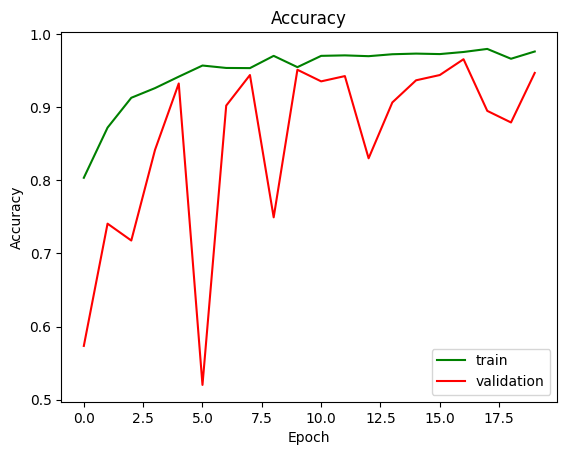

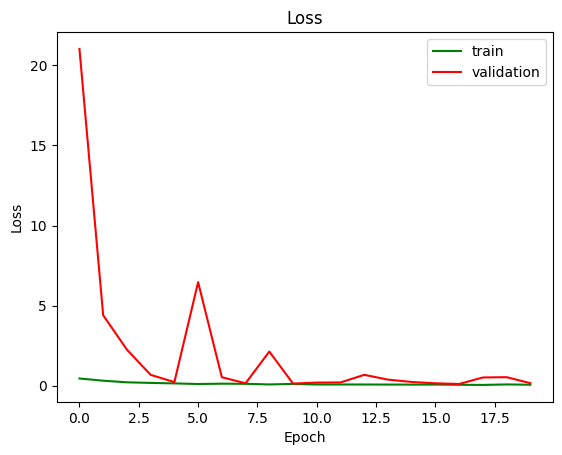

In [12]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss')
    plt.show()
    
plot_accuracy(history)
plot_loss(history)

In [13]:
# Using the test dataset
score = model.evaluate_generator(test_set)
print('Test loss:', score[0])
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Test loss: 0.15867042541503906

accuracy: 94.67%

